In [290]:
import numpy as np
import pandas as pd
import requests
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 120
pd.options.display.max_rows = 120

## Read ADE metadata and make a list of classes

In [2]:
dfh = pd.read_csv('ade20k_header.csv')
dfd = pd.read_csv('ade20k_detail.csv')

In [3]:
dfh.sample(5)

,header_id,width,height,filename,folder,scene
13057,24036,1024,679,ADE_train_00024036.jpg,ADE20K_2021_17_01/images/ADE/training/sports_and_leisure/park,"['outdoor', 'sports and leisure', 'park']"
446,5323,1556,1054,ADE_train_00005323.jpg,ADE20K_2021_17_01/images/ADE/training/cultural/catwalk,"['indoor', 'cultural', 'catwalk']"
12125,1850,384,254,ADE_train_00001850.jpg,ADE20K_2021_17_01/images/ADE/training/sports_and_leisure/athletic_field__indoor,"['indoor', 'sports and leisure', 'athletic_field indoor']"
1247,22718,640,480,ADE_train_00022718.jpg,ADE20K_2021_17_01/images/ADE/training/home_or_hotel/attic,"['indoor', 'home or hotel', 'attic']"
4831,20983,1467,2200,ADE_train_00020983.jpg,ADE20K_2021_17_01/images/ADE/training/home_or_hotel/hotel_room,"['indoor', 'home or hotel', 'hotel_room']"


In [4]:
dfd.sample(5)

,id,raw_name,depth_ordering_rank,crop,header_id,num_mask_points,xmin,ymin,xmax,ymax,width,height
360710,48,window,49,0,12319,4,251,1646,300,1705,49,59
288575,27,books,28,0,4384,4,31,122,48,169,17,47
92029,53,drawer,54,0,566,4,405,366,554,410,149,44
45751,21,faucet,22,0,3000,14,230,451,250,478,20,27
247539,11,floor,12,0,20027,5,0,131,15,149,15,18


In [6]:
classes_ade = dfd.raw_name.value_counts().index

## Read COCO classes

In [16]:
f = requests.get('https://raw.githubusercontent.com/amikelive/coco-labels/master/coco-labels-paper.txt')
classes_coco = f.text.split('\n')

## Make a mapping dataframe

In [198]:
df = pd.DataFrame(columns=['coco', 'ade'])

In [199]:
df['coco'] = classes_coco

### Get the intersection and populate with same value ade=coco

In [295]:
coco_intersect_ade = set(classes_coco).intersection(set(classes_ade))
df['ade'] = df.apply(lambda x: ['{}'.format(x['coco'])] if x['coco'] in coco_intersect_ade else np.nan, axis=1)

## Make mappings for each unmatched class

In [305]:
df.iloc[3]['ade'] = ['motorbike', 'motorbikes']
df.iloc[29]['ade'] = ['glasses', 'eyeglasses']
df.iloc[36]['ade'] = ['ball', 'balls', 'baseball', 'basketball', 'football']
df.iloc[38]['ade'] = ['bat']
df.iloc[42]['ade'] = ['racket', 'rackets', 'racquet']
df.iloc[51]['ade'] = ['bananas']
df.iloc[55]['ade'] = ['vegetables']
df.iloc[56]['ade'] = ['vegetables']
df.iloc[62]['ade'] = ['sofa']
df.iloc[63]['ade'] = ['flowerpot', 'pot', 'plant pot', 'plant pots', 'pots', 'coffee pot', 'potters wheel', 'plants pot', 'flowerpots', 'pant pot']
df.iloc[66]['ade'] = ['table', 'tables']
df.iloc[71]['ade'] = ['television', 'tele vision', 'televisio']
df.iloc[74]['ade'] = ['remote control']
df.iloc[88]['ade'] = ['hair dryer']
df.iloc[90]['ade'] = ['hairbrush']

### Here are the unmatched classes

In [288]:
df.loc[df.ade.isnull()]

,coco,ade
12,stop sign,NaN
24,giraffe,NaN
33,frisbee,NaN
45,wine glass,NaN
57,hot dog,NaN
58,pizza,NaN
59,donut,NaN


### Here are the matched classes

In [306]:
df.loc[df.ade.notnull()]

,coco,ade
0,person,[person]
1,bicycle,[bicycle]
2,car,[car]
3,motorcycle,"[motorbike, motorbikes]"
4,airplane,[airplane]
5,bus,[bus]
6,train,[train]
7,truck,[truck]
8,boat,[boat]
9,traffic light,[traffic light]


## Write mapping to csv

In [310]:
df.to_csv('coco_ade20k_mappings.csv')

## Expand the mappings so we have one row per ade class

In [363]:
ade_single = df.apply(lambda x: pd.Series(x['ade']),axis=1).stack().reset_index(level=1, drop=True)
ade_single.name = 'ade_single'
mappings = df.join(ade_single).set_index('ade_single')['coco'].to_dict()
dfd['coco_label'] = dfd.raw_name.apply(lambda x: mappings[x] if x in mappings.keys() else np.nan)

## Grab masks with >= 15 points and matching coco labels

In [372]:
dfd15 = dfd.loc[(dfd.coco_label.notnull()) & (dfd.num_mask_points>=15)].reset_index(drop=True)
dfd15.sample(5)

,id,raw_name,depth_ordering_rank,crop,header_id,num_mask_points,xmin,ymin,xmax,ymax,width,height,coco_label
18085,18,person,18,1,24756,47,436,325,531,612,95,287,person
9918,44,plate,45,0,20653,24,933,1329,1082,1378,149,49,plate
56699,12,person,13,1,7564,34,277,35,434,274,157,239,person
57426,1,truck,2,0,11797,30,2,116,267,229,265,113,truck
51723,19,person,20,1,18392,26,109,246,141,330,32,84,person


In [373]:
dfd15.to_csv('ade_coco_15pts.csv')

## Manually go through unmatched classes and explore

### Helper function to show image + segmentation

In [132]:
################################################################################
# Given the header and detail meta dataframes and ids, draw the image + segmentation + bounding box.
def show_img_seg(dfh=dfh, dfd=dfd, header_id=None, detail_id=None):
    
    # Get folder and filenames.
    folder, filename = dfh.loc[dfh.header_id==header_id][['folder', 'filename']].values[0]
    segfile = '{}_seg.png'.format(filename.split('.')[0])
    
    # Choose font for text.
    font = ImageFont.truetype("DejaVuSans.ttf", 20)
    
    # Open original and segmentation images.
    with Image.open('../{}/{}'.format(folder, filename)) as im, Image.open('../{}/{}'.format(folder, segfile)) as seg:
        draw_im = ImageDraw.Draw(im)
        draw_seg = ImageDraw.Draw(seg)
        
        # Get bbox.
        xmin, ymin, xmax, ymax, width, height = dfd.loc[(dfd.header_id==header_id) & (dfd.id==detail_id)][['xmin', 'ymin', 'xmax', 'ymax', 'width', 'height']].values[0]
        
        # Draw red bbox on image and segmentation, and crop the bbox.
        draw_im.rectangle((xmin, ymin, xmax, ymax), width=2, outline='red')
        draw_im.text((xmin+width/2.5, ymin+height/3.5), str(detail_id), (256,0,0), font=font)
        draw_seg.rectangle((xmin, ymin, xmax, ymax), width=2, outline='red')
        draw_seg.text((xmin+width/2.5, ymin+height/3.5), str(detail_id), (256,0,0), font=font)
        im_crop = seg.crop((xmin, ymin, xmax+1, ymax+1))
        
        # Show images.
        fig, ax = plt.subplots(1, 3, figsize=(20,8))
        ax[0].imshow(im)
        ax[1].imshow(seg)
        ax[2].imshow(im_crop)
        plt.tight_layout()
        
        print('{}:{} im={} seg={} bbox={} xy={}'.format(filename,
                                                        detail_id,
                                                        im.size,
                                                        seg.size,
                                                        (width, height),
                                                        (xmin, ymin, xmax, ymax)
                                                       )
             )

################################################################################
# Given a class name, get a random header/detail and call show_img_seg.
def show_ade_random(classname):
    header_id, detail_id = dfd.loc[dfd.raw_name==classname].sample()[['header_id', 'id']].values[0]
    show_img_seg(header_id=header_id, detail_id=detail_id)

### For example, check which classes belong to COCO "motorcycle" class

In [73]:
print(dfd.loc[dfd.raw_name.str.contains('motor')].raw_name.value_counts())

motorbike         589
motor              56
motorbikes         48
motorboat           3
motorbike cart      1
motorboats          1
Name: raw_name, dtype: int64


ADE_train_00000498.jpg.37 im=(800, 537) seg=(800, 537) bbox=(64, 52) xy=(322, 51, 386, 103)


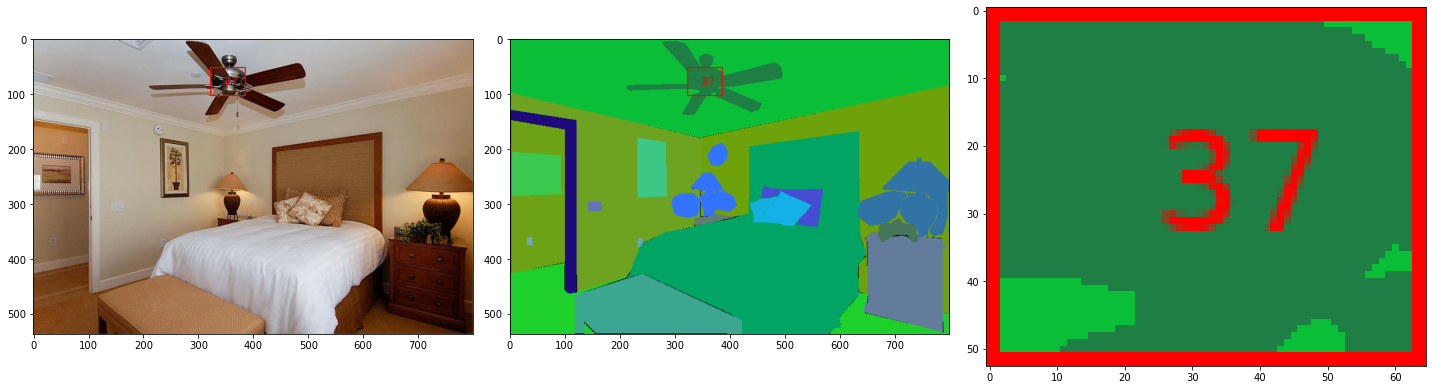

In [113]:
show_ade_random('motor')

ADE_train_00001453.jpg:4 im=(480, 640) seg=(480, 640) bbox=(94, 75) xy=(193, 528, 287, 603)


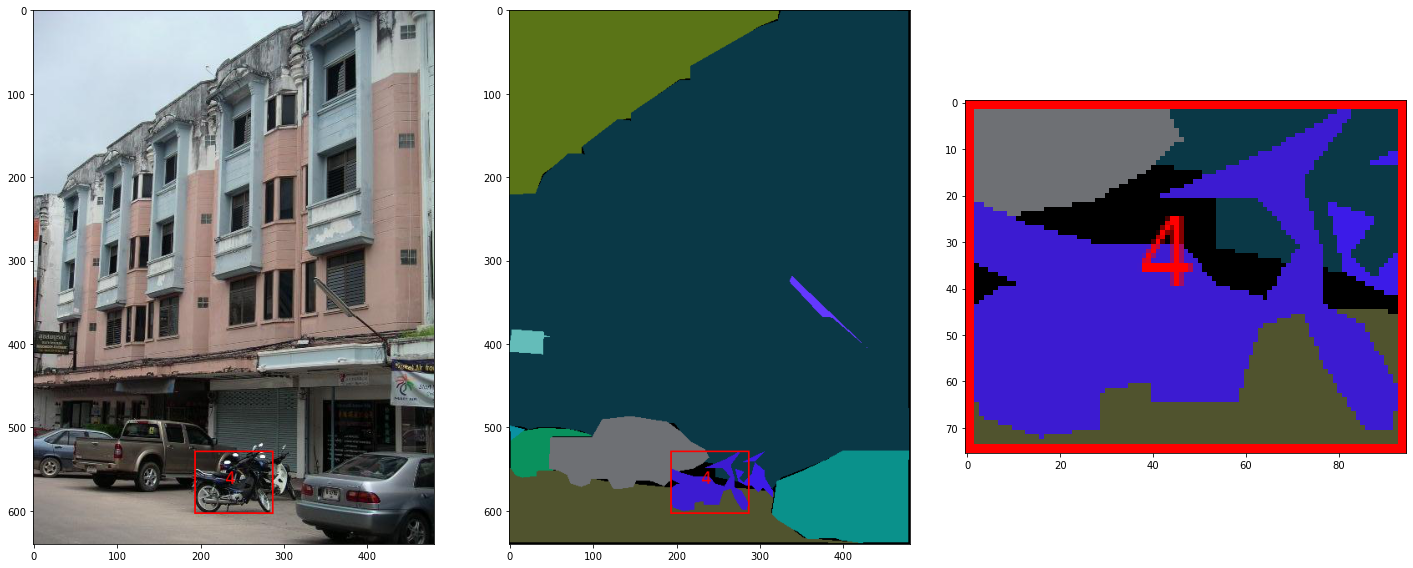

In [137]:
show_ade_random('motorbike')

In [114]:
dfd.loc[dfd.raw_name.isin(['motorbike', 'motorbikes'])].raw_name.value_counts()

motorbike     589
motorbikes     48
Name: raw_name, dtype: int64

### Other classes

In [279]:
classname = 'brush'
print(dfd.loc[dfd.raw_name.str.contains(classname)].raw_name.value_counts())
print(dfd.loc[dfd.raw_name.str.contains(classname)].raw_name.value_counts().index)

brush                  61
brushes                37
toothbrush             30
toilet brush           27
paintbrush             20
paint brushes          11
hairbrush              10
blusher brush           6
shaving brush           2
nail brush              1
electric toothbrush     1
Name: raw_name, dtype: int64
Index(['brush', 'brushes', 'toothbrush', 'toilet brush', 'paintbrush',
       'paint brushes', 'hairbrush', 'blusher brush', 'shaving brush',
       'nail brush', 'electric toothbrush'],
      dtype='object')


ADE_train_00012376.jpg:12 im=(2048, 1536) seg=(2048, 1536) bbox=(1002, 430) xy=(1010, 1101, 2012, 1531)


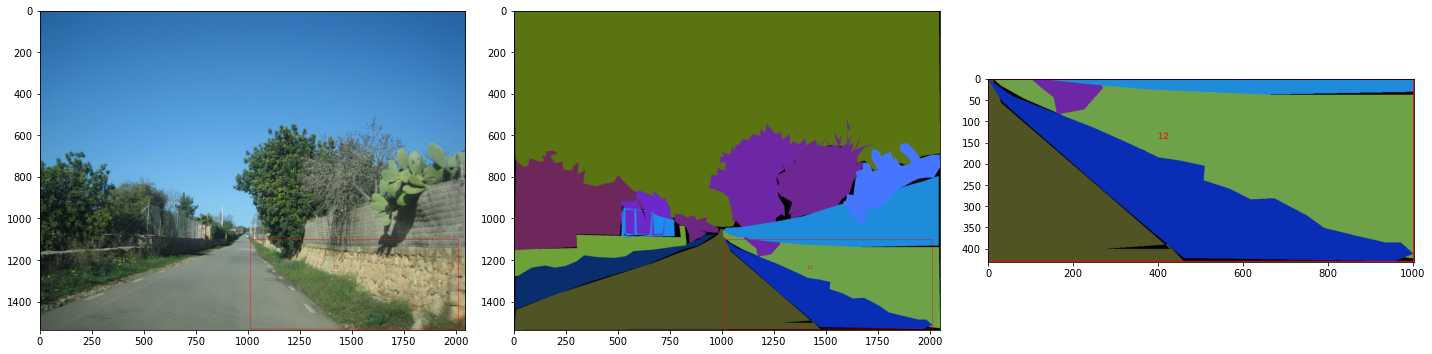

In [281]:
show_ade_random('brushes')